# Convolutional Neural Networks para Classificação de Imagens

Utilizando o Conjunto de Dados [Fashion MNIST](https://www.kaggle.com/zalando-research/fashionmnist)

Iniciamos importando as bibliotecas básicas necessárias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

Carregamos os Dados e Dividimos eles em Treinamento e Teste

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Imprimimos o formato dos Dados de Treinamento

60.000 imagens de dimensões 28x28 pixels

In [3]:
print(x_train.shape)

(60000, 28, 28)


Projetamos o Gráfico da Imagem de Índice 3 que representa um vestido

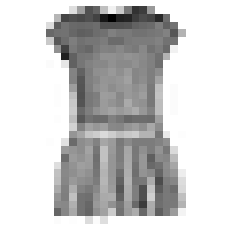

In [4]:
plt.imshow(x_train[3],cmap='binary');
plt.axis('off');

Imprimimos o Valor Máximo e Mínimo encontrados na Matriz de Números da Imagem

In [5]:
print(f'Valor Máximo: {x_train.max()}')
print(f'Valor Mínimo: {x_train.min()}')

Valor Máximo: 255
Valor Mínimo: 0


Performamos o Scaling dos Dados dividindo-os por **255**

In [6]:
x_train = x_train / 255
x_test = x_test / 255

Alteramos a Dimensão dos Dados para podermos alimentar o Algoritmo

Eles atualmente estão em 2 Dimensões e precisam ser alterados para 3 Dimensões *(height, width, color)*

In [7]:
x_train = x_train.reshape(60_000, 28, 28, 1)
x_test = x_test.reshape(10_000, 28, 28, 1)

Verificamos o Número de Classes Disponíveis

In [8]:
K = len(set(y_train))
print(f'Número de classes = {K}')

Número de classes = 10


Transformamos os Targets em Categóricos

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_categorical_train = to_categorical(y_train, 10)
y_categorical_test = to_categorical(y_test, 10)

#### Construímos o Modelo 

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Imprimimos o Sumário de nosso Modelo para Referência

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


Treinamos o Modelo

In [14]:
model.fit(x_train, y_categorical_train, validation_data=(x_test, y_categorical_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3944 - accuracy: 0.8593 - val_loss: 0.3131 - val_accuracy: 0.8883
Epoch 2/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2708 - accuracy: 0.9013 - val_loss: 0.2947 - val_accuracy: 0.8934
Epoch 3/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2280 - accuracy: 0.9155 - val_loss: 0.2778 - val_accuracy: 0.8982
Epoch 4/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1960 - accuracy: 0.9262 - val_loss: 0.2610 - val_accuracy: 0.9078
Epoch 5/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1690 - accuracy: 0.9370 - val_loss: 0.2834 - val_accuracy: 0.9059
Epoch 6/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1453 - accuracy: 0.9454 - val_loss: 0.2635 - val_accuracy: 0.9102
Epoch 7/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1222 - accuracy: 0.9541 - val_loss: 0.2868 -

Analisamos as Métricas de Desempenho do Modelo

In [16]:
model.metrics_names

['loss', 'accuracy']

In [17]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.394376,0.859283,0.313103,0.8883
1,0.270779,0.901300,0.294747,0.8934
2,0.227964,0.915533,0.277834,0.8982
3,0.196024,0.926233,0.260985,0.9078
4,0.168954,0.937033,0.283382,0.9059
5,0.145316,0.945417,0.263541,0.9102
6,0.122212,0.954050,0.286830,0.9091
7,0.104852,0.961117,0.305091,0.9097
8,0.090329,0.966067,0.330915,0.9075
9,0.078414,0.971083,0.324272,0.9134


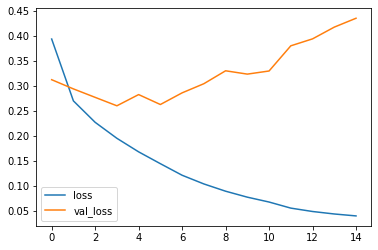

In [18]:
metrics[['loss','val_loss']].plot();

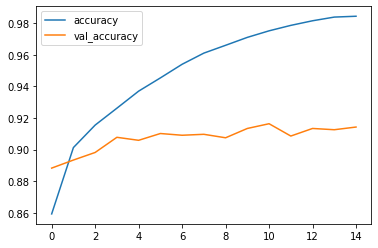

In [19]:
metrics[['accuracy','val_accuracy']].plot();

Em *Machine Learning*, o objetivo é alcançar modelos que **generalizem**, ou seja, que executem bem em dados nunca antes vistos - e **overfitting** é o obstáculo central. Podemos apenas controlar o que podemos observar, por isso é crucial que sejamos capazes de medir de forma confiável o
poder de generalização de nosso modelo. 

Avaliar um modelo sempre se resume a dividir os dados disponíveis em três conjuntos: **treinamento**, **validação** e **teste**. Treinamos o modelo com os dados de treinamento e avaliamos ele nos dados de validação. Quando o modelo estiver pronto para o funcionamento, testamos-no pela última vez nos dados de teste.

A razão pelo qual dividimos em três distintos conjuntos é que desenvolver um modelo sempre envolve ajustar sua configuração: por
exemplo, escolhendo o número de *layers* ou o tamanho das *layers* (chamados de hiper parâmetros do modelo, para distingui-los dos parâmetros, que são os *weights* da rede neural). Fazemos esse ajuste usando como um sinal de feedback o desempenho do modelo nos dados de validação. Em essência, esse ajuste é uma forma de aprendizagem: uma busca por uma boa configuração em algum espaço de parâmetro. Como resultado, ajustando a configuração do modelo com base em seu desempenho no conjunto de validação pode resultar rapidamente em **overfitting** ao conjunto de validação, mesmo que o modelo nunca seja diretamente treinado nele.

Central para esse fenômeno é a noção de [vazamento de informações](https://en.wikipedia.org/wiki/Leakage_(machine_learning)). Cada vez que ajustamos um hiperparâmetro do modelo com base no desempenho do modelo em relação ao conjunto de validação, algumas informações sobre os dados de validação vazam  para o modelo. Se fizermos isto apenas uma vez, para um parâmetro, muito poucos bits de informação vazarão, e o conjunto de validação permanecerá confiável para avaliar o modelo. Mas se repetirmos muitas vezes - executando um experimento, avaliando o conjunto de validação e modificando o modelo como resultado, então será vazada uma quantidade cada vez mais significativa de informações sobre o conjunto de validação no modelo.

No fim das contas, acabaremos com um modelo que funciona artificialmente bem nos dados de validação, porque é para isso que ele foi otimizado. Devemos nos preocupar com o desempenho do modelo em **dados completamente novos**, não com os dados de validação, então precisamos usar um conjunto de dados totalmente diferente e nunca antes visto para avaliar o modelo: o conjunto de dados de **teste**. O modelo não deve ter acesso a nenhuma informação sobre o conjunto de teste, mesmo indiretamente.

O problema fundamental em *Machine Learning* é a tensão entre otimização e generalização. Otimização se refere ao processo de ajustar um modelo para obter o melhor desempenho possível nos dados de treinamento (o aprendizado em *Machine Learning*), enquanto a generalização se refere a quão bem o modelo treinado executa em dados que nunca viu antes. O objetivo do jogo é obter uma boa generalização, de fato, mas não controlamos a generalização; só podemos ajustar o modelo com base nos dados de treinamento.

No início do treinamento, a otimização e a generalização estão correlacionadas: quanto menor a *[Loss](https://en.wikipedia.org/wiki/Loss_function)* nos dados de treinamento, menor a *Loss* nos dados de teste. Enquanto isso está acontecendo, o modelo é considerado *underfit*: ainda há progresso a ser feito; a rede neural ainda não modelou todos os padrões relevantes nos dados de treinamento. Mas depois de um certo número de iterações nos dados de treinamento, a generalização irá parar de melhorar e as métricas de validação param e, em seguida, começam a degradar: o modelo está começando a se ajustar demais (*overfit*). Ou seja, está começando a aprender padrões que são específicos aos dados de treinamento, mas que são enganosos ou irrelevantes quando se trata de novos dados.

Para evitar que um modelo aprenda padrões enganosos ou irrelevantes encontrados nos dados de treinamento, a melhor solução é obter mais dados de treinamento. Um modelo treinado em mais dados irá naturalmente generalizar melhor. Quando isso não for possível, a próxima melhor solução é modular a quantidade de informações que o modelo pode armazenar ou adicionar restrições sobre quais informações podem ser armazenadas. Se uma rede só puder memorizar um pequeno número de padrões, o processo de otimização a forçará a se concentrar nos padrões mais proeminentes, que têm uma chance melhor de generalizar bem.

#### Interpretando as Curvas de Aprendizado

Podemos considerar as informações nos dados de treinamento como sendo de dois tipos: **sinal** e **ruído**. O sinal é a parte que generaliza, a parte que pode ajudar nosso modelo a fazer previsões a partir de novos dados. O ruído é a parte que só vale para os dados de treinamento; o ruído é toda a flutuação aleatória que vem de dados no mundo real ou todos os padrões incidentais e não informativos que não podem realmente ajudar o modelo a fazer previsões. O ruído é a parte que pode parecer útil, mas realmente não é.

Treinamos um modelo escolhendo *weights* ou parâmetros que minimizam a *Loss* em um conjunto de treinamento. Devemos saber, no entanto, que para avaliar com precisão o desempenho de um modelo, precisamos avaliá-lo em um novo conjunto de dados, os dados de validação. 

Quando treinamos um modelo, estamos registrando a *Loss* no conjunto de treinamento *epoch* por *epoch*. Para isso, adicionaremos um gráfico dos dados de validação também. Chamamos esses gráficos de curvas de aprendizado. Para treinar modelos de *Deep Learning* com eficácia, precisamos ser capazes de interpretá-los.

![img](https://raw.githubusercontent.com/the-akira/DeepLearning/master/Imagens/LearningCurves.png)

- *Validation Loss* fornece uma estimativa do erro esperado em dados não vistos.

Agora, o *training loss* diminuirá quando o modelo aprender o sinal ou o ruído. Mas a *validation loss* diminuirá apenas quando o modelo aprender o sinal. (Qualquer ruído que o modelo aprendeu com o conjunto de treinamento não generalizará para novos dados.) Portanto, quando um modelo aprende o sinal, ambas as curvas caem, mas quando ele aprende o ruído, uma lacuna é criada nas curvas. O tamanho da lacuna informa quanto ruído o modelo aprendeu.

Idealmente, criaríamos modelos que aprendessem todo o sinal e nenhum ruído. Isso praticamente nunca vai acontecer. Em vez disso, fazemos uma troca. Podemos fazer com que o modelo aprenda mais sinal ao custo de aprender mais ruído. Enquanto a troca estiver a nosso favor, a *validation loss* continuará diminuindo. Depois de certo ponto, porém, a troca pode se voltar contra nós, o custo ultrapassa o benefício e a *validation loss* começa a aumentar.

![img](https://raw.githubusercontent.com/the-akira/DeepLearning/master/Imagens/UnderOverFitting.png)

Essa compensação indica que pode haver dois problemas que ocorrem ao treinar um modelo: sinal insuficiente ou muito ruído. O ajuste insuficiente do conjunto de treinamento ocorre quando a *Loss* não é tão baixa quanto poderia porque o modelo não aprendeu o sinal suficiente. O **overfitting** do conjunto de treinamento é quando a *Loss* não é tão baixa quanto poderia porque o modelo aprendeu muito ruído. O truque para treinar modelos de *Deep Learning* é encontrar o melhor equilíbrio entre os dois.

No primeiro modelo que definimos e treinamos está ocorrendo justamente o **overfitting**, quando um modelo está aprendendo muito ansiosamente o ruído, a *validation loss* pode começar a aumentar durante o treinamento. Para evitar isso, podemos simplesmente interromper o treinamento sempre que parecer que a *validation loss* não está mais diminuindo. Interromper o treinamento dessa forma é chamado de **early stopping**.

![img](https://raw.githubusercontent.com/the-akira/DeepLearning/master/Imagens/EarlyStopping.png)

Treinar com **early stopping** também significa que corremos menos risco de interromper o treinamento muito cedo, antes que a rede termine de aprender o sinal. Portanto, além de evitar que o overfitting ocorra por treinar por muito tempo, a **early stopping** também pode evitar que o underfitting ocorra por não treinar por tempo suficiente. Basta definirmos as *epochs* de treinamento para um número grande (mais do que você precisa) e a **early stopping** cuidará do resto.

Vamos então definir um novo modelo e utilizar o **early stopping**!

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=0)

In [38]:
model.fit(x_train, y_categorical_train, validation_data=(x_test, y_categorical_test), epochs=15, callbacks=[early_stop])

Epoch 1/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.4281 - accuracy: 0.8473 - val_loss: 0.3298 - val_accuracy: 0.8800
Epoch 2/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2995 - accuracy: 0.8910 - val_loss: 0.2953 - val_accuracy: 0.8902
Epoch 3/15
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2552 - accuracy: 0.9054 - val_loss: 0.2642 - val_accuracy: 0.9042
Epoch 4/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2279 - accuracy: 0.9159 - val_loss: 0.2547 - val_accuracy: 0.9068
Epoch 5/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2036 - accuracy: 0.9237 - val_loss: 0.2482 - val_accuracy: 0.9094
Epoch 6/15
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1852 - accuracy: 0.9307 - val_loss: 0.2549 - val_accuracy: 0.9108


In [39]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.428062,0.847300,0.329799,0.8800
1,0.299535,0.891050,0.295320,0.8902
2,0.255152,0.905350,0.264221,0.9042
3,0.227854,0.915867,0.254714,0.9068
4,0.203601,0.923750,0.248205,0.9094
5,0.185228,0.930683,0.254875,0.9108


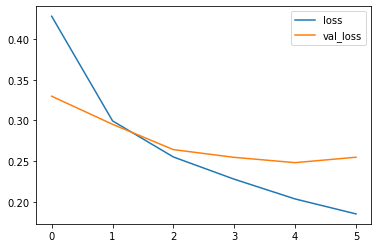

In [40]:
metrics[['loss','val_loss']].plot();

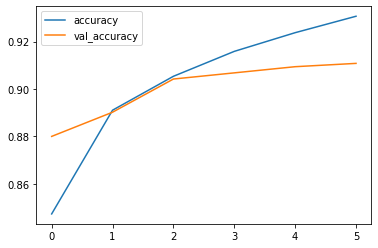

In [41]:
metrics[['accuracy','val_accuracy']].plot();

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.84      0.86      1000
           3       0.90      0.93      0.91      1000
           4       0.89      0.82      0.85      1000
           5       0.99      0.98      0.98      1000
           6       0.72      0.78      0.75      1000
           7       0.94      0.98      0.96      1000
           8       0.96      0.99      0.97      1000
           9       0.98      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Função que irá Projetar uma Matriz de Confusão Completa

In [45]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    Função que imprime e plota a Matriz de Confusão.
    Normalização pode ser aplicada ao setar o parâmetro 'Normalize = True'
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print('Matriz de Confusão Normalizada')
    else:
        print('Matriz de Confusão sem Normalização')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j],fmt), horizontalalignment='center',
                color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    plt.show()

Matriz de Confusão sem Normalização
[[852   3  11  24   4   1  94   0  11   0]
 [  0 983   0  10   1   0   4   0   2   0]
 [ 16   2 844   8  48   0  77   0   5   0]
 [ 12   3  11 934  16   0  21   0   3   0]
 [  1   1  52  31 817   0  98   0   0   0]
 [  0   0   0   0   0 978   0  14   0   8]
 [ 80   1  49  32  35   0 783   0  20   0]
 [  0   0   0   0   0   7   0 978   1  14]
 [  2   0   0   4   0   1   3   2 988   0]
 [  0   0   0   0   0   5   1  43   0 951]]


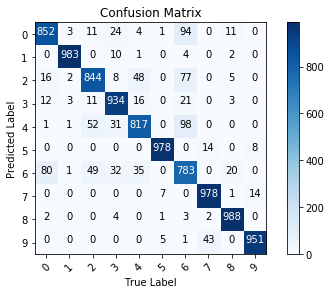

In [46]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Mapeamento de Labels

In [47]:
labels = """
T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot""".split()
print(labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle', 'boot']


Apresentamos alguns Exemplos que foram Classificados Erroneamente pelo Modelo

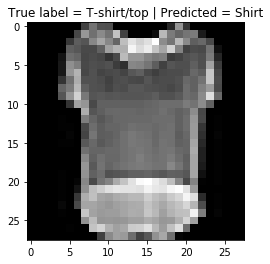

In [48]:
index_miss_classified = np.where(p_test != y_test)[0]
i = np.random.choice(index_miss_classified)
plt.imshow(x_test[i].reshape(28,28), cmap='gray');
plt.title(f'True label = {labels[y_test[i]]} | Predicted = {labels[p_test[i]]}');